In [1]:
import sys
sys.path.insert(0, '../')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fsize = 12
params = {'legend.fontsize': fsize*0.925,          
          'axes.labelsize': fsize,
          'axes.titlesize':fsize*1.25,
          'xtick.labelsize':fsize*0.925,
          'ytick.labelsize':fsize*0.925}
sns.set(palette='pastel', rc=params)


import os
import numpy as np
import scipy.io as sio

import seaborn as sns

from utils import io_utils
from analysis import analysis_funcs as af
from analysis import stats
from analysis import exp_filepaths
import pandas as pd
pd.set_option('display.max_colwidth', 50)
pd.options.display.float_format = '{:,.4f}'.format

/home/arjundd/anaconda3/envs/tf_36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
early_stopping_exps = {'$\delta:1e^{-4}, \\tau:2$': exp_filepaths.EARLY_STOPPING_2_1e4,
                       '$\delta:1e^{-4}, \\tau:4$': exp_filepaths.EARLY_STOPPING_4_1e4,
                       '$\delta:1e^{-4}, \\tau:6$': exp_filepaths.EARLY_STOPPING_6_1e4,
                       '$\delta:1e^{-3}, \\tau:4$': exp_filepaths.EARLY_STOPPING_4_1e3,
                       '$\delta:1e^{-5}, \\tau:4$': exp_filepaths.EARLY_STOPPING_4_1e5,
                       '$\delta:0, \\tau:\\infty$': exp_filepaths.ARCH_UNET_RAW}
ordered_keys = ['$\delta:1e^{-4}, \\tau:2$', '$\delta:1e^{-4}, \\tau:4$', 
                '$\delta:1e^{-4}, \\tau:6$', '$\delta:1e^{-3}, \\tau:4$', 
                '$\delta:1e^{-5}, \\tau:4$',
                '$\delta:0, \\tau:\infty$']
cpal = sns.color_palette("muted", 8)

In [3]:
def linear_smoothing(vals, weight=0.6):
    info = [vals[i-1]*weight + vals[i]*(1-weight) for i in range(1,len(vals))]
    a = [np.nan]
    a.extend(info)
    return a

Text(0,0.5,'Validation Loss')

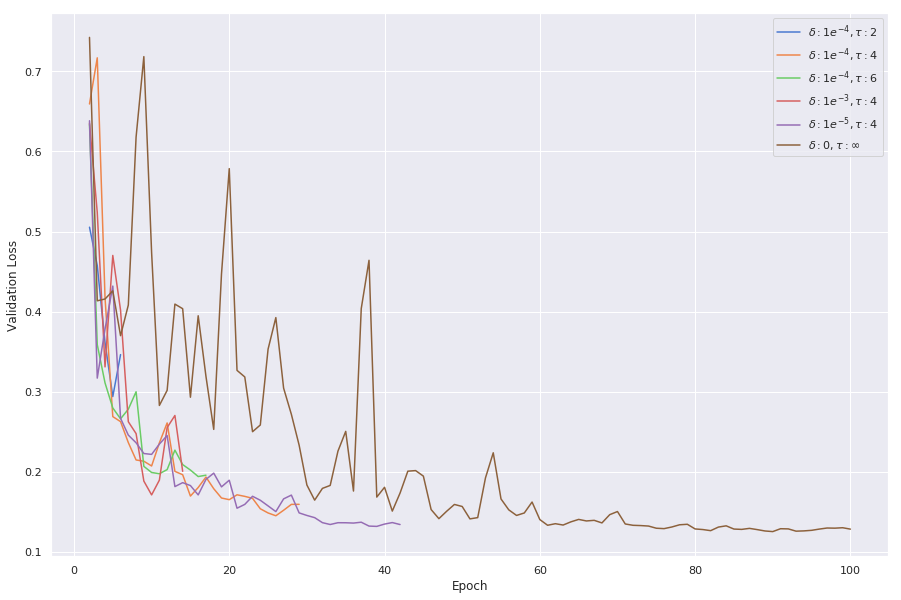

In [4]:
# plot validation losses
fig, ax = plt.subplots(1,1, figsize=(15, 10))

count = 0
for k in ordered_keys:
    exp_filepath = early_stopping_exps[k]
    # load pik file
    ind = exp_filepath.find('test_results')
    base_folder = exp_filepath[:ind]
    pik_path = os.path.join(base_folder, 'pik_data.dat')
    data = io_utils.load_pik(pik_path)
    epochs = data[0]
    val_loss = data[2]
    y = linear_smoothing(val_loss)
    ax.plot(epochs, y, color=cpal[count], linestyle='-')
    
    count += 1

ax.legend(ordered_keys)
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation Loss')

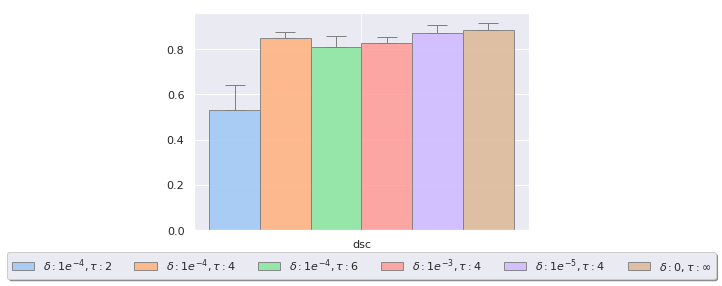

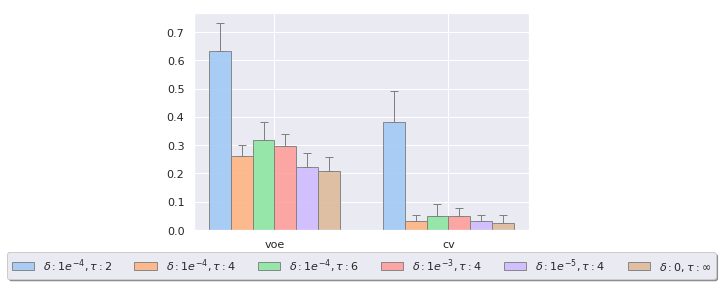

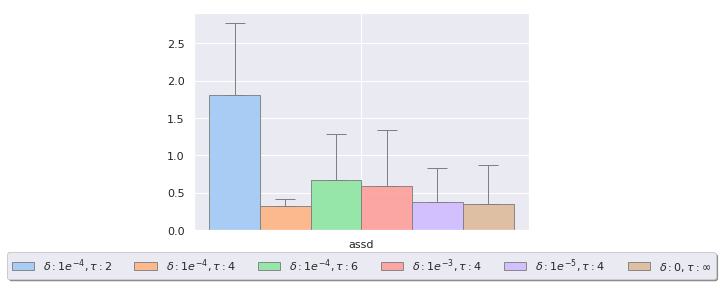

,"$\delta:1e^{-4}, \tau:2$","$\delta:1e^{-4}, \tau:4$","$\delta:1e^{-4}, \tau:6$","$\delta:1e^{-3}, \tau:4$","$\delta:1e^{-5}, \tau:4$","$\delta:0, \tau:\infty$"
dsc,$0.5296\pm0.11$,$0.85\pm0.028$,$0.8098\pm0.048$,$0.825\pm0.03$,$0.873\pm0.031$,$0.883\pm0.033$
voe,$0.6324\pm0.099$,$0.2598\pm0.041$,$0.3171\pm0.063$,$0.2967\pm0.043$,$0.224\pm0.048$,$0.208\pm0.05$
cv,$0.3825\pm0.11$,$0.0309\pm0.021$,$0.0497\pm0.042$,$0.0498\pm0.029$,$0.0305\pm0.022$,$0.0244\pm0.027$
assd,$1.8095\pm0.964$,$0.3202\pm0.092$,$0.6681\pm0.624$,$0.5876\pm0.746$,$0.3723\pm0.461$,$0.3544\pm0.518$


In [5]:
# plot validation losses
def plot_metrics(metrics):
    count = 0
    t_mean = []
    t_error = []

    for m in metrics:
        m_mean = []
        m_error = []
        for k in ordered_keys:
            exp_filepath = early_stopping_exps[k]
            metrics_path = os.path.join(exp_filepath, 'metrics.dat')
            data = io_utils.load_pik(metrics_path)[m]

            m_mean.append(np.mean(data))
            m_error.append(np.std(data))

        t_mean.append(m_mean)
        t_error.append(m_error)

    exp_means = pd.DataFrame(t_mean, index=metrics, columns=ordered_keys)
    exp_stds = pd.DataFrame(t_error, index=metrics, columns=ordered_keys)
    
    af.display_bar_graph(exp_means, exp_stds)
    
    df1 = exp_means.round(4).astype(str)
    df2 = exp_stds.round(3).astype(str)
    
    return '$'+df1 + '\pm' + df2 +'$'
    
dfs = []
dfs.append(plot_metrics(['dsc']))
dfs.append(plot_metrics(['voe', 'cv']))
dfs.append(plot_metrics(['assd']))

df = pd.concat(dfs, axis=0)
df.style.set_properties(**{'width': '300px'})
display(df)

In [6]:
ES = {'filename': 'early_stopping',
        'keys': ordered_keys}
ES.update(early_stopping_exps)

stats.kruskal_dunn_analysis([ES[k] for k in ES['keys']], ES['keys'])
#stats.compare_metrics_v2([ES[k] for k in ES['keys']], ES['keys'], 'stats-early_stopping')

dsc
F-value: 112.7532
p-value: 0.0000
Dunn: 


,"$\delta:1e^{-4}, \tau:2$","$\delta:1e^{-4}, \tau:4$","$\delta:1e^{-4}, \tau:6$","$\delta:1e^{-3}, \tau:4$","$\delta:1e^{-5}, \tau:4$","$\delta:0, \tau:\infty$"
"$\delta:1e^{-4}, \tau:2$",-1,3.43176e-09,0.00148606,0.000123635,1.24456e-15,4.35267e-19
"$\delta:1e^{-4}, \tau:4$",3.43176e-09,-1,0.215596,0.897809,0.705061,0.0592988
"$\delta:1e^{-4}, \tau:6$",0.00148606,0.215596,-1,1,0.000138708,1.47587e-06
"$\delta:1e^{-3}, \tau:4$",0.000123635,0.897809,1,-1,0.00164509,2.85061e-05
"$\delta:1e^{-5}, \tau:4$",1.24456e-15,0.705061,0.000138708,0.00164509,-1,1
"$\delta:0, \tau:\infty$",4.35267e-19,0.0592988,1.47587e-06,2.85061e-05,1,-1



voe
F-value: 112.7532
p-value: 0.0000
Dunn: 


,"$\delta:1e^{-4}, \tau:2$","$\delta:1e^{-4}, \tau:4$","$\delta:1e^{-4}, \tau:6$","$\delta:1e^{-3}, \tau:4$","$\delta:1e^{-5}, \tau:4$","$\delta:0, \tau:\infty$"
"$\delta:1e^{-4}, \tau:2$",-1,3.43176e-09,0.00148606,0.000123635,1.24456e-15,4.35267e-19
"$\delta:1e^{-4}, \tau:4$",3.43176e-09,-1,0.215596,0.897809,0.705061,0.0592988
"$\delta:1e^{-4}, \tau:6$",0.00148606,0.215596,-1,1,0.000138708,1.47587e-06
"$\delta:1e^{-3}, \tau:4$",0.000123635,0.897809,1,-1,0.00164509,2.85061e-05
"$\delta:1e^{-5}, \tau:4$",1.24456e-15,0.705061,0.000138708,0.00164509,-1,1
"$\delta:0, \tau:\infty$",4.35267e-19,0.0592988,1.47587e-06,2.85061e-05,1,-1



cv
F-value: 81.6862
p-value: 0.0000
Dunn: 


,"$\delta:1e^{-4}, \tau:2$","$\delta:1e^{-4}, \tau:4$","$\delta:1e^{-4}, \tau:6$","$\delta:1e^{-3}, \tau:4$","$\delta:1e^{-5}, \tau:4$","$\delta:0, \tau:\infty$"
"$\delta:1e^{-4}, \tau:2$",-1,1.48765e-10,2.71696e-07,1.37075e-05,1.25243e-10,7.42991e-15
"$\delta:1e^{-4}, \tau:4$",1.48765e-10,-1,1,0.864747,1,1
"$\delta:1e^{-4}, \tau:6$",2.71696e-07,1,-1,1,1,0.195138
"$\delta:1e^{-3}, \tau:4$",1.37075e-05,0.864747,1,-1,0.817056,0.0203796
"$\delta:1e^{-5}, \tau:4$",1.25243e-10,1,1,0.817056,-1,1
"$\delta:0, \tau:\infty$",7.42991e-15,1,0.195138,0.0203796,1,-1



assd
F-value: 110.2409
p-value: 0.0000
Dunn: 


,"$\delta:1e^{-4}, \tau:2$","$\delta:1e^{-4}, \tau:4$","$\delta:1e^{-4}, \tau:6$","$\delta:1e^{-3}, \tau:4$","$\delta:1e^{-5}, \tau:4$","$\delta:0, \tau:\infty$"
"$\delta:1e^{-4}, \tau:2$",-1,1.00333e-09,0.154348,0.000215764,2.49271e-14,1.76887e-16
"$\delta:1e^{-4}, \tau:4$",1.00333e-09,-1,0.00111703,0.428342,1,0.639212
"$\delta:1e^{-4}, \tau:6$",0.154348,0.00111703,-1,1,1.00884e-06,3.16681e-08
"$\delta:1e^{-3}, \tau:4$",0.000215764,0.428342,1,-1,0.00431144,0.000371307
"$\delta:1e^{-5}, \tau:4$",2.49271e-14,1,1.00884e-06,0.00431144,-1,1
"$\delta:0, \tau:\infty$",1.76887e-16,0.639212,3.16681e-08,0.000371307,1,-1



precision
F-value: 47.6454
p-value: 0.0000
Dunn: 


,"$\delta:1e^{-4}, \tau:2$","$\delta:1e^{-4}, \tau:4$","$\delta:1e^{-4}, \tau:6$","$\delta:1e^{-3}, \tau:4$","$\delta:1e^{-5}, \tau:4$","$\delta:0, \tau:\infty$"
"$\delta:1e^{-4}, \tau:2$",-1,1,0.000123635,1,1,1
"$\delta:1e^{-4}, \tau:4$",1,-1,0.0781013,1,0.0239436,0.0717154
"$\delta:1e^{-4}, \tau:6$",0.000123635,0.0781013,-1,0.00128178,4.00866e-08,2.94188e-07
"$\delta:1e^{-3}, \tau:4$",1,1,0.00128178,-1,0.647679,1
"$\delta:1e^{-5}, \tau:4$",1,0.0239436,4.00866e-08,0.647679,-1,1
"$\delta:0, \tau:\infty$",1,0.0717154,2.94188e-07,1,1,-1



recall
F-value: 106.7988
p-value: 0.0000
Dunn: 


,"$\delta:1e^{-4}, \tau:2$","$\delta:1e^{-4}, \tau:4$","$\delta:1e^{-4}, \tau:6$","$\delta:1e^{-3}, \tau:4$","$\delta:1e^{-5}, \tau:4$","$\delta:0, \tau:\infty$"
"$\delta:1e^{-4}, \tau:2$",-1,4.31822e-11,9.04983e-09,0.0286002,4.57911e-11,2.04955e-18
"$\delta:1e^{-4}, \tau:4$",4.31822e-11,-1,1,0.00157252,1,0.574781
"$\delta:1e^{-4}, \tau:6$",9.04983e-09,1,-1,0.0305159,1,0.0624755
"$\delta:1e^{-3}, \tau:4$",0.0286002,0.00157252,0.0305159,-1,0.00162665,4.00866e-08
"$\delta:1e^{-5}, \tau:4$",4.57911e-11,1,1,0.00162665,-1,0.563337
"$\delta:0, \tau:\infty$",2.04955e-18,0.574781,0.0624755,4.00866e-08,0.563337,-1
